In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
import os
import re
import csv

In [2]:
DJIA_df = pd.read_csv('DJIA_Friday_Changes.csv', engine='python')
VTI_df = pd.read_csv('VTI_Friday_Changes.csv', engine='python')

#Google Trends Vader
means_df = pd.read_csv('mean_sentiments.csv', engine='python')
weightedMeans_df = pd.read_csv('weighted_means.csv', engine='python')
weightedSums_df = pd.read_csv('weighted_sums.csv', engine='python')
sums_df = pd.read_csv('sum_sentiments.csv', engine='python')


dates_df = pd.read_csv('dates.csv', engine='python')
fridays_df = pd.read_csv('friday_dates.csv', engine='python')

#Google Trends Textblob
sums_blob = pd.read_csv('sum_textblob.csv', engine='python')
means_blob = pd.read_csv('mean_textblob.csv', engine='python')
weightedSums_blob = pd.read_csv('weighted_sum_textblob.csv', engine='python')
weightedMeans_blob = pd.read_csv('weighted_mean_textblob.csv', engine='python')

#NYT
nyt_df = pd.read_csv('nyt_data.csv', engine='python')

#Songs
songs_df = pd.read_csv('df_billboard_daily_scores.csv', engine='python')


#BERT
berttrends_df = pd.read_csv('bertTrends.csv', engine='python')


In [3]:
from datetime import date


songs_df['date'] = pd.to_datetime(songs_df['date'])
songs_df['date'] = songs_df['date'] - pd.Timedelta(1, unit='D')
songs_df['date'] = songs_df['date'].astype(str)

print(songs_df)

           date  whole_song_score  mean_by_sentence_song_score  \
0    2017-01-06          0.363559                     0.062743   
1    2017-01-13          0.309067                     0.052593   
2    2017-01-20          0.273529                     0.042909   
3    2017-01-27          0.340584                     0.050312   
4    2017-02-03          0.320253                     0.048724   
..          ...               ...                          ...   
248  2021-10-08          0.236315                     0.034011   
249  2021-10-15          0.316908                     0.042636   
250  2021-10-22          0.434036                     0.058646   
251  2021-10-29          0.350872                     0.047024   
252  2021-11-05          0.379722                     0.045309   

     mean_without_0_by_sentence_song_score  tb_whole_song  \
0                                 0.120276       0.102399   
1                                 0.092073       0.075327   
2                       

In [4]:
nyt_df['nyt_vader_mean'] = nyt_df['nyt_vader_mean']
nyt_df['nyt_vader_sum'] = nyt_df['nyt_vader_sum']

#nyt_df['nyt_textblob_mean'] = nyt_df['nyt_textblob_mean']
nyt_df['nyt_textblob_sum'] = nyt_df['nyt_textblob_sum']

print(nyt_df)

           date  nyt_vader_mean  nyt_vader_sum  nyt_textblob_mean  \
0    2017-01-06        0.036672        32.9315           0.081494   
1    2017-01-13        0.065618        79.0701           0.080998   
2    2017-01-20        0.042616        52.4178           0.077942   
3    2017-01-27        0.030436        36.2800           0.069687   
4    2017-02-03        0.033411        43.8023           0.096456   
..          ...             ...            ...                ...   
256  2021-12-03        0.009555         9.0776           0.098896   
257  2021-12-10        0.033716        30.8838           0.074385   
258  2021-12-17        0.010576         9.9205           0.078534   
259  2021-12-24        0.014384        12.2982           0.072344   
260  2021-12-31        0.020004        10.8019           0.080636   

     nyt_textblob_sum  
0           73.181184  
1           97.602924  
2           95.868136  
3           83.067046  
4          126.453248  
..                ...  
256

In [5]:
VTI_df.rename(columns={'Date':'date'}, inplace=True)
VTI_df.rename(columns={'percent_change':'percent_change_VTI'}, inplace=True)
VTI_df.rename(columns={'change':'change_VTI'}, inplace=True)
print(VTI_df)

           date        Open        High         Low       Close   Adj Close  \
0    2016-12-30  116.000000  116.000000  114.959999  115.320000  103.203789   
1    2017-01-06  117.019997  117.519997  116.639999  117.230003  104.913101   
2    2017-01-13  116.989998  117.400002  116.980003  117.220001  104.904152   
3    2017-01-20  116.839996  117.230003  116.589996  116.910004  104.626740   
4    2017-01-27  118.449997  118.480003  118.019997  118.160004  105.745415   
..          ...         ...         ...         ...         ...         ...   
248  2021-11-26  237.240005  238.100006  234.940002  235.990005  229.577545   
249  2021-12-03  234.830002  235.270004  229.020004  231.190002  224.907974   
250  2021-12-10  239.419998  239.869995  237.570007  239.529999  233.021347   
251  2021-12-17  235.000000  237.160004  233.339996  235.440002  229.042480   
252  2021-12-31  242.089996  242.690002  241.440002  241.440002  235.720779   

      Volume day_of_week  change_VTI  percent_chang

In [6]:
print(DJIA_df)

           date     value day_of_week   change  percent_change
0    2016-12-30  19762.60      Friday     0.00        0.000000
1    2017-01-06  19963.80      Friday   201.20        0.010078
2    2017-01-13  19885.73      Friday   -78.07       -0.003926
3    2017-01-20  19827.25      Friday   -58.48       -0.002949
4    2017-01-27  20093.78      Friday   266.53        0.013264
..          ...       ...         ...      ...             ...
248  2021-11-26  34899.34      Friday  -702.64       -0.020133
249  2021-12-03  34580.08      Friday  -319.26       -0.009232
250  2021-12-10  35970.99      Friday  1390.91        0.038668
251  2021-12-17  35365.44      Friday  -605.55       -0.017123
252  2021-12-31  36338.30      Friday   972.86        0.026772

[253 rows x 5 columns]


In [7]:
means_df = means_df
print(means_df)

            0
0    0.055956
1    0.031796
2    0.005624
3    0.000000
4   -0.050028
..        ...
257  0.034428
258  0.035516
259 -0.025440
260  0.029784
261 -0.043744

[262 rows x 1 columns]


In [8]:
weightedMeans_df = weightedMeans_df
print(weightedMeans_df)

             0
0     41.57780
1     17.41816
2     -8.68760
3      0.00000
4    -96.18980
..         ...
257    6.47448
258    6.45984
259   -6.72800
260   26.97220
261 -190.48920

[262 rows x 1 columns]


In [9]:
weightedSums_df = weightedSums_df
print(weightedSums_df)

            0
0    1039.445
1     435.454
2    -217.190
3       0.000
4   -2404.745
..        ...
257   161.862
258   161.496
259  -168.200
260   674.305
261 -4762.230

[262 rows x 1 columns]


In [10]:
sums_df = sums_df
print(sums_df)

          0
0    1.3989
1    0.7949
2    0.1406
3    0.0000
4   -1.2507
..      ...
257  0.8607
258  0.8879
259 -0.6360
260  0.7446
261 -1.0936

[262 rows x 1 columns]


In [11]:
means_blob = means_blob
print(means_blob)

            0
0    0.130909
1    0.067333
2   -0.021212
3    0.009455
4   -0.018485
..        ...
257  0.010400
258 -0.040000
259  0.010400
260  0.000000
261  0.084182

[262 rows x 1 columns]


In [12]:
weightedMeans_blob = weightedMeans_blob
print(weightedMeans_blob)

              0
0    143.827273
1     75.446667
2    -26.439394
3      4.581818
4      2.681818
..          ...
257    2.200000
258  -18.400000
259    2.216000
260    0.120000
261   69.827273

[262 rows x 1 columns]


In [13]:
weightedSums_blob = weightedSums_blob
print(weightedSums_blob)

               0
0    3595.681818
1    1886.166667
2    -660.984848
3     114.545455
4      67.045455
..           ...
257    55.000000
258  -460.000000
259    55.400000
260     3.000000
261  1745.681818

[262 rows x 1 columns]


In [14]:
sums_blob = sums_blob
print(sums_blob)

            0
0    3.272727
1    1.683333
2   -0.530303
3    0.236364
4   -0.462121
..        ...
257  0.260000
258 -1.000000
259  0.260000
260  0.000000
261  2.104545

[262 rows x 1 columns]


In [15]:
print(dates_df)

              0
0    2017-01-03
1    2017-01-10
2    2017-01-17
3    2017-01-24
4    2017-01-31
..          ...
257  2021-12-07
258  2021-12-14
259  2021-12-21
260  2021-12-28
261  2022-01-04

[262 rows x 1 columns]


In [16]:
print(fridays_df)

              0
0    2017-01-06
1    2017-01-13
2    2017-01-20
3    2017-01-27
4    2017-02-03
..          ...
257  2021-12-10
258  2021-12-17
259  2021-12-24
260  2021-12-31
261  2022-01-07

[262 rows x 1 columns]


In [17]:
print(berttrends_df)

     Trends Bert Mean  Trends Bert Sum
0           -0.050067        -1.251682
1           -0.170870        -4.271750
2           -0.521403       -13.035087
3            0.110961         2.774018
4           -0.319780        -7.994504
..                ...              ...
257         -0.179629        -4.490720
258         -0.229584        -5.739590
259         -0.348724        -8.718106
260          0.120229         3.005734
261         -0.080491        -2.012285

[262 rows x 2 columns]


In [18]:
frames = [dates_df, means_df, sums_df, weightedMeans_df, weightedSums_df, means_blob, sums_blob, weightedMeans_blob, weightedSums_blob, berttrends_df, fridays_df]
total_df = pd.concat(frames, axis=1)

In [19]:
total_df.columns = ['real_date_trends_songs', 'vader_mean', 'vader_sum', 'vader_weighted_mean', 'vader_weighted_sum', 'textblob_mean', 'textblob_sum', 'textblob_weighted_mean', 'textblob_weighted_sum', 'trends_bert_mean', 'trends_bert_sum', 'date']
print(total_df)

    real_date_trends_songs  vader_mean  vader_sum  vader_weighted_mean  \
0               2017-01-03    0.055956     1.3989             41.57780   
1               2017-01-10    0.031796     0.7949             17.41816   
2               2017-01-17    0.005624     0.1406             -8.68760   
3               2017-01-24    0.000000     0.0000              0.00000   
4               2017-01-31   -0.050028    -1.2507            -96.18980   
..                     ...         ...        ...                  ...   
257             2021-12-07    0.034428     0.8607              6.47448   
258             2021-12-14    0.035516     0.8879              6.45984   
259             2021-12-21   -0.025440    -0.6360             -6.72800   
260             2021-12-28    0.029784     0.7446             26.97220   
261             2022-01-04   -0.043744    -1.0936           -190.48920   

     vader_weighted_sum  textblob_mean  textblob_sum  textblob_weighted_mean  \
0              1039.445       0

In [20]:
df_all = total_df.merge(DJIA_df.drop_duplicates(), on=['date'], 
                   how='left')

df_all = df_all.merge(VTI_df.drop_duplicates(), on=['date'], 
                   how='left')

df_all = df_all.merge(nyt_df.drop_duplicates(), on=['date'], 
                   how='left')

df_all = df_all.merge(songs_df.drop_duplicates(), on=['date'], 
                   how='left')

#df_all = df_all.sort_values(by='date')

print(df_all)

    real_date_trends_songs  vader_mean  vader_sum  vader_weighted_mean  \
0               2017-01-03    0.055956     1.3989             41.57780   
1               2017-01-10    0.031796     0.7949             17.41816   
2               2017-01-17    0.005624     0.1406             -8.68760   
3               2017-01-24    0.000000     0.0000              0.00000   
4               2017-01-31   -0.050028    -1.2507            -96.18980   
..                     ...         ...        ...                  ...   
257             2021-12-07    0.034428     0.8607              6.47448   
258             2021-12-14    0.035516     0.8879              6.45984   
259             2021-12-21   -0.025440    -0.6360             -6.72800   
260             2021-12-28    0.029784     0.7446             26.97220   
261             2022-01-04   -0.043744    -1.0936           -190.48920   

     vader_weighted_sum  textblob_mean  textblob_sum  textblob_weighted_mean  \
0              1039.445       0

In [59]:
#df_all.to_csv('master.csv', index=False)

print(df_all['percent_change'])

0      0.010078
1     -0.003926
2     -0.002949
3      0.013264
4     -0.001112
         ...   
257    0.038668
258   -0.017123
259         NaN
260    0.026772
261         NaN
Name: percent_change, Length: 262, dtype: float64


<AxesSubplot:xlabel='date'>

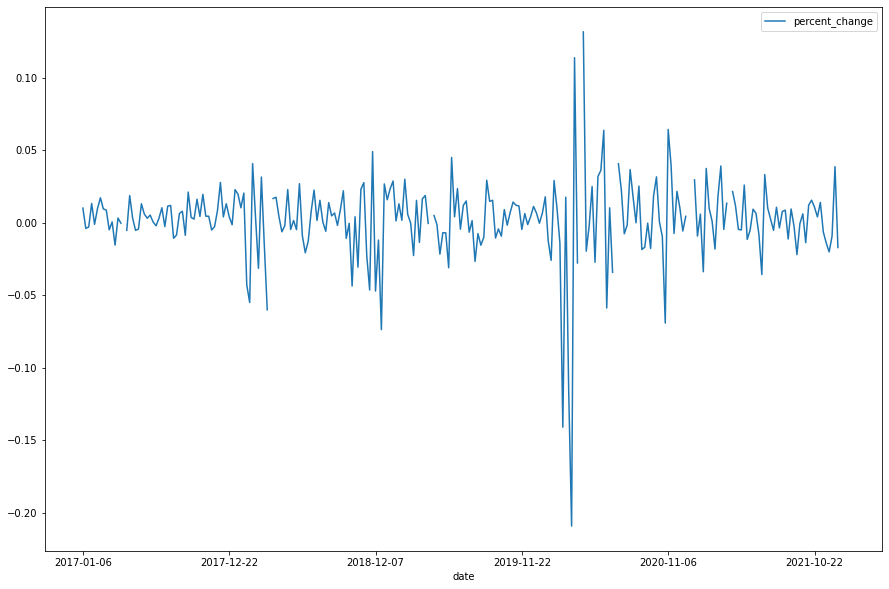

In [22]:
df_all.plot(x='date', y=['percent_change'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

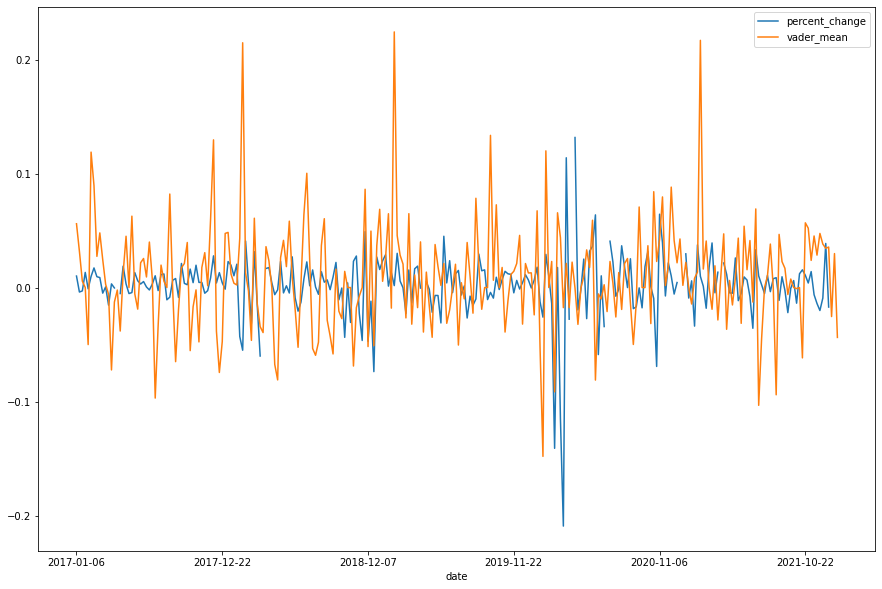

In [23]:
df_all.plot(x='date', y=['percent_change', 'vader_mean'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

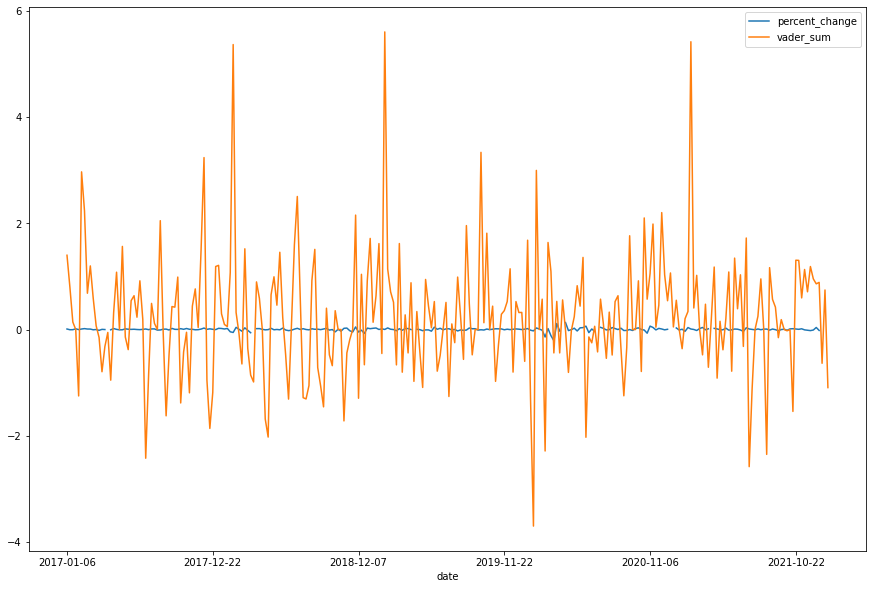

In [24]:
df_all.plot(x='date', y=['percent_change', 'vader_sum'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

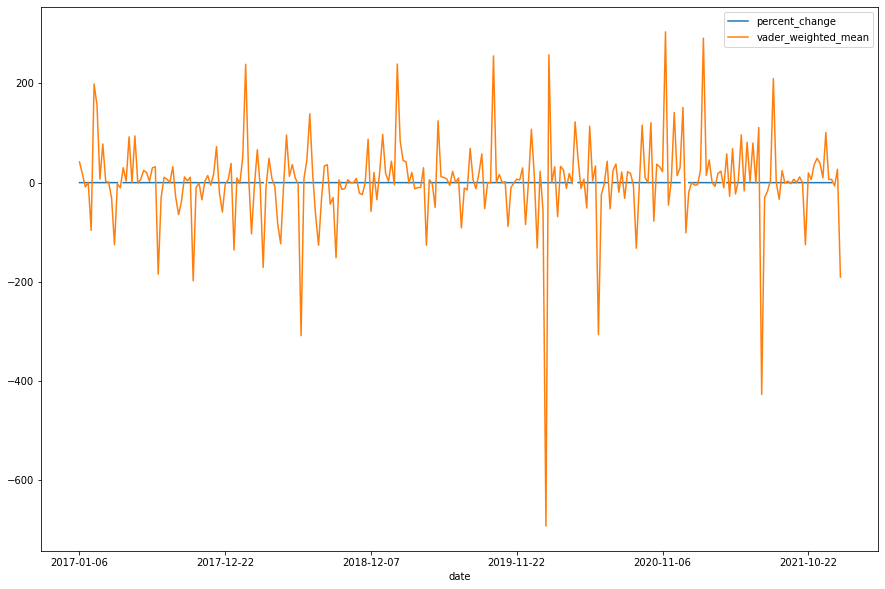

In [25]:
df_all.plot(x='date', y=['percent_change', 'vader_weighted_mean'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

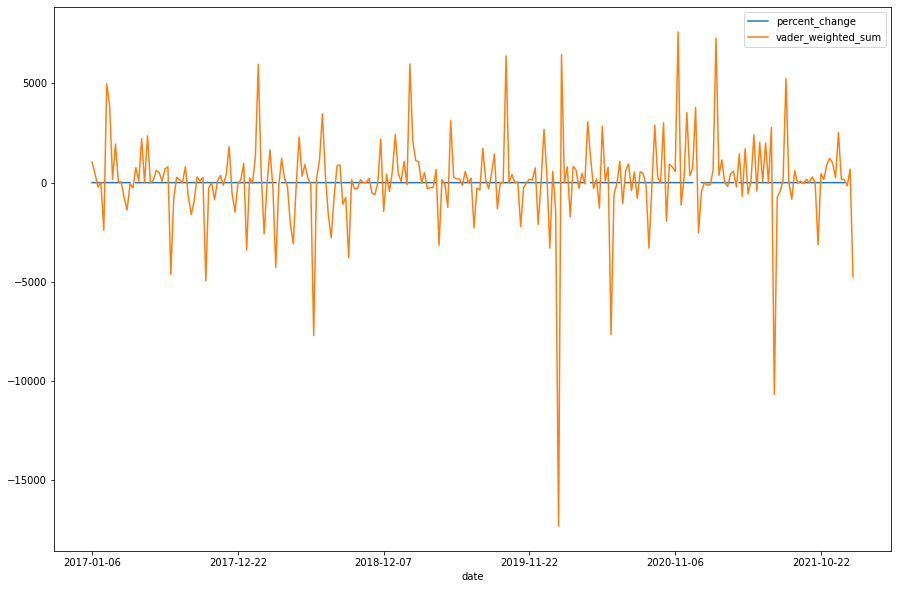

In [26]:
df_all.plot(x='date', y=['percent_change', 'vader_weighted_sum'], figsize=(15, 10))

In [27]:
print("ABOVE: VADER, BELOW: TEXTBLOB")

ABOVE: VADER, BELOW: TEXTBLOB


<AxesSubplot:xlabel='date'>

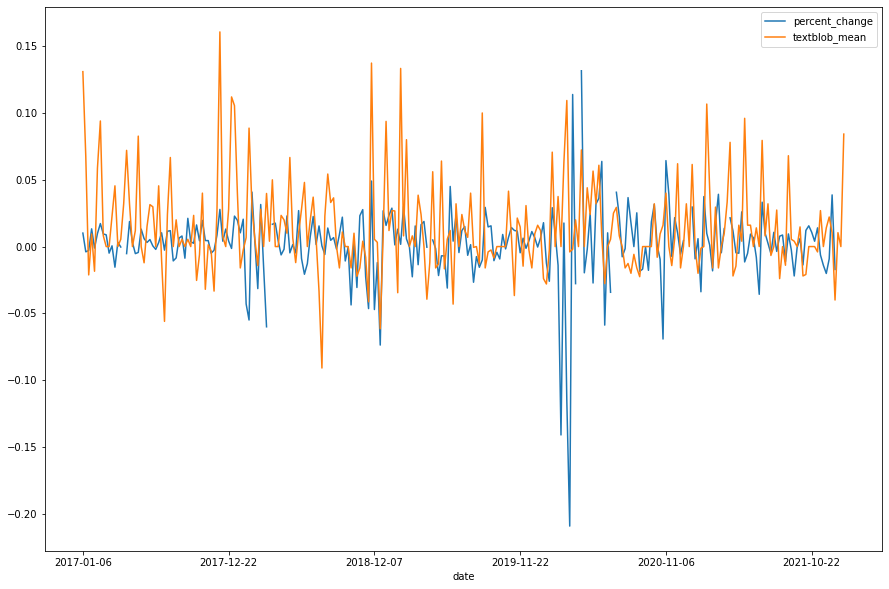

In [28]:
df_all.plot(x='date', y=['percent_change', 'textblob_mean'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

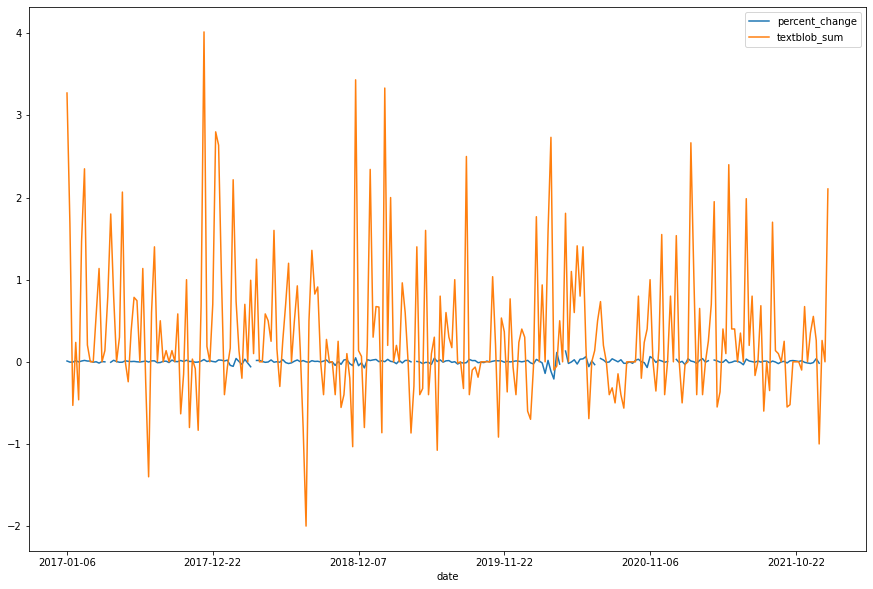

In [29]:
df_all.plot(x='date', y=['percent_change', 'textblob_sum'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

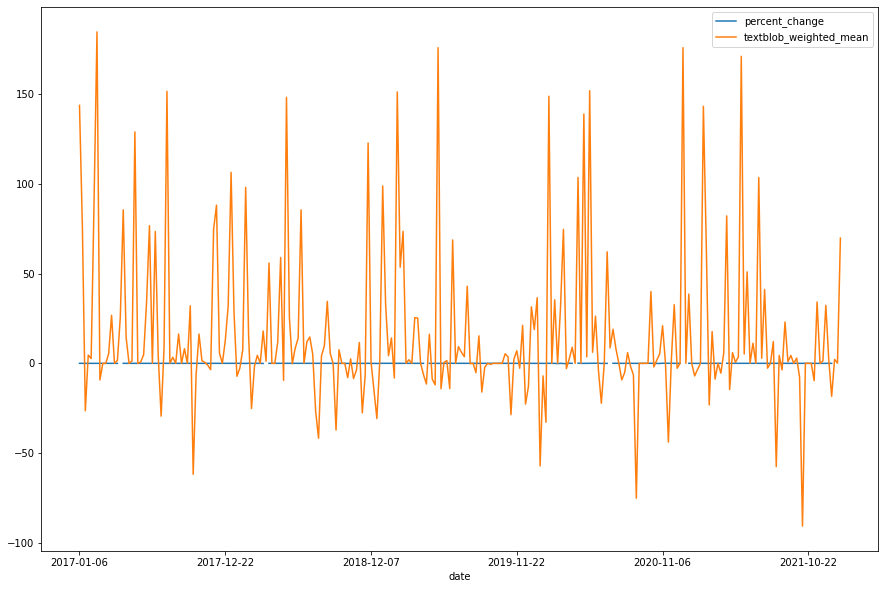

In [30]:
df_all.plot(x='date', y=['percent_change', 'textblob_weighted_mean'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

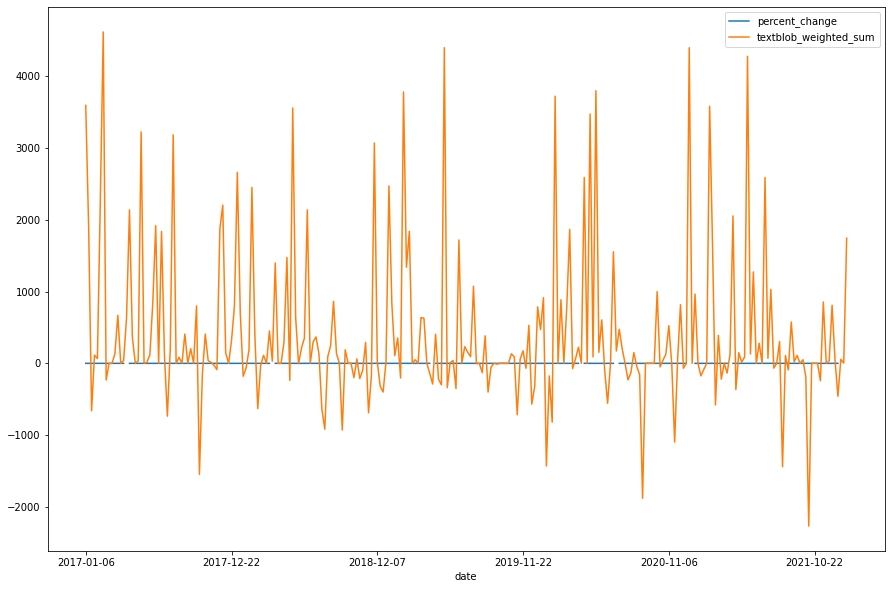

In [31]:
df_all.plot(x='date', y=['percent_change', 'textblob_weighted_sum'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

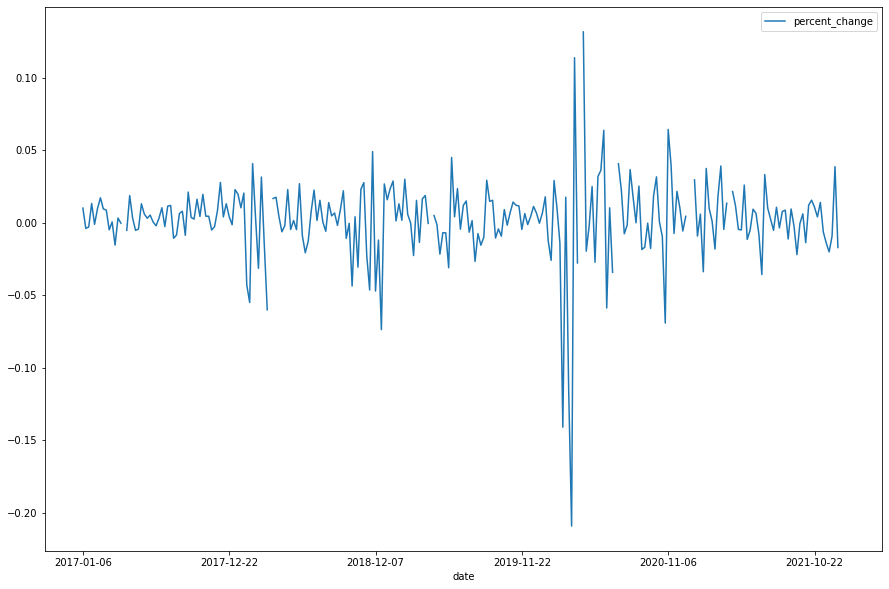

In [32]:
df_all.plot(x='date', y=['percent_change'], figsize=(15, 10))

In [33]:
print("NYT Data")

NYT Data


<AxesSubplot:xlabel='date'>

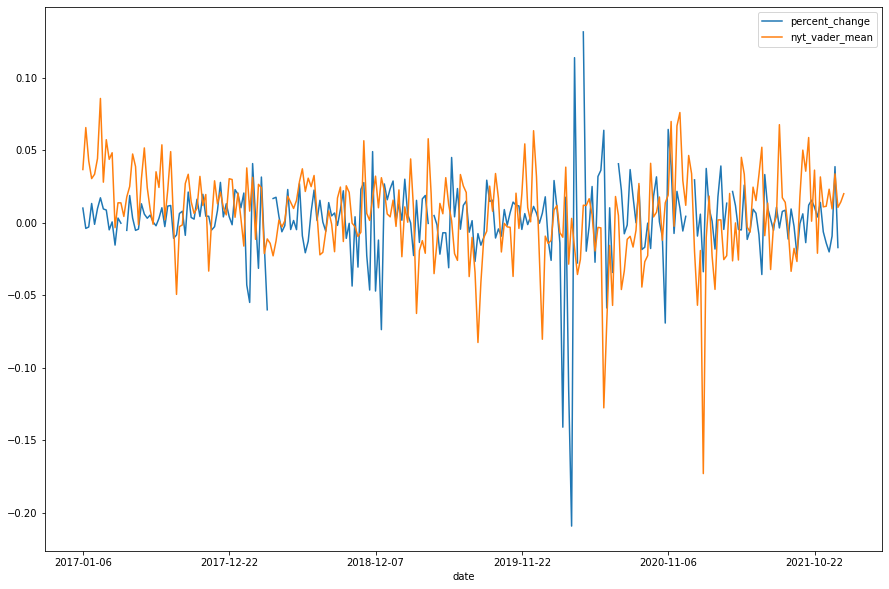

In [34]:
df_all.plot(x='date', y=['percent_change', 'nyt_vader_mean'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

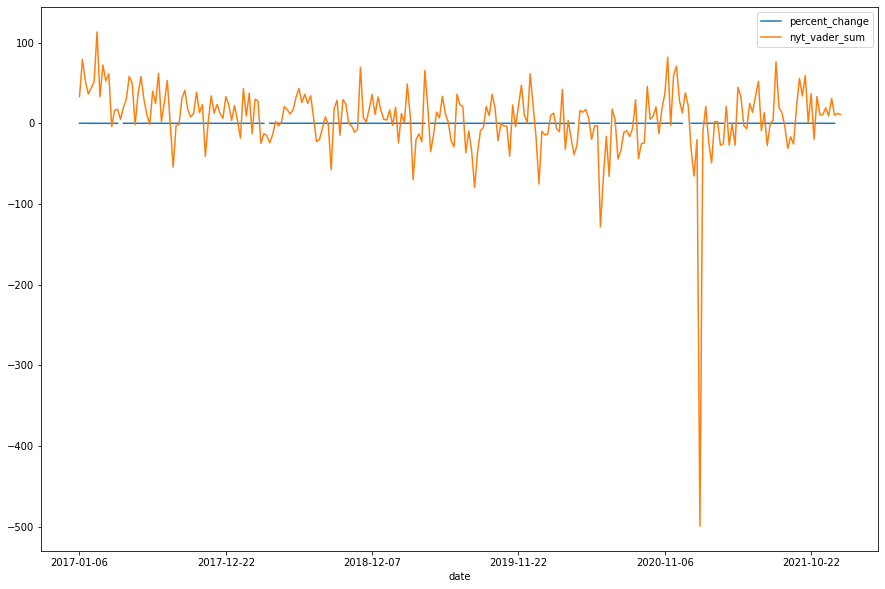

In [35]:
df_all.plot(x='date', y=['percent_change', 'nyt_vader_sum'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

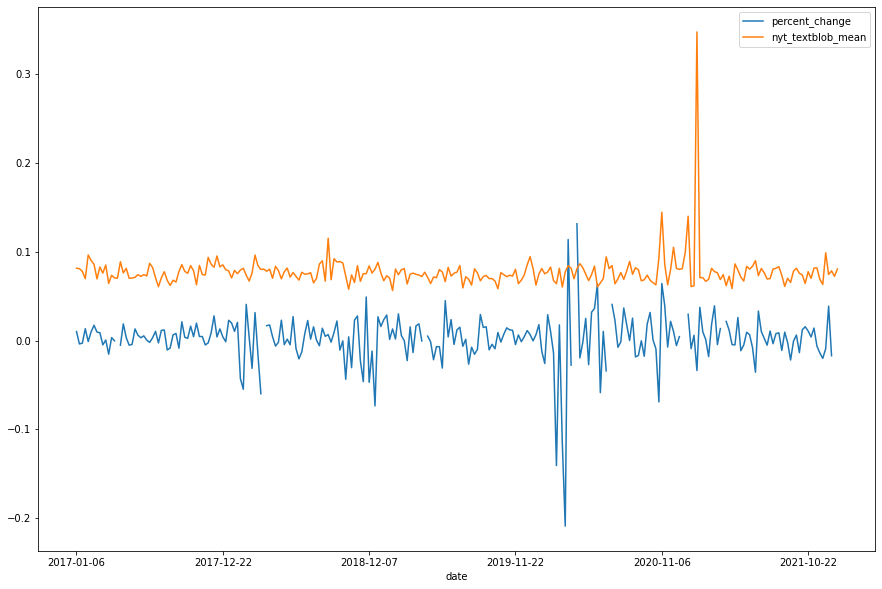

In [36]:
df_all.plot(x='date', y=['percent_change', 'nyt_textblob_mean'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

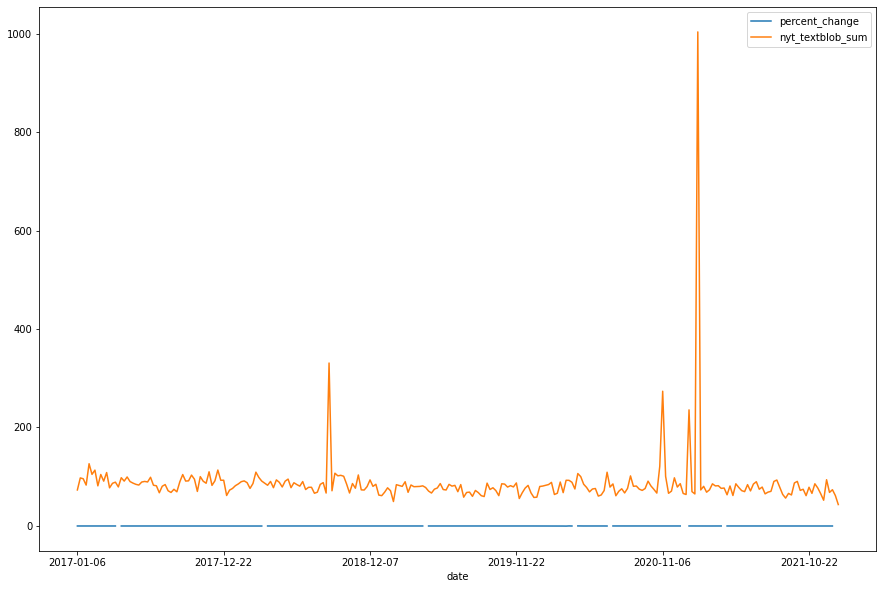

In [37]:
df_all.plot(x='date', y=['percent_change', 'nyt_textblob_sum'], figsize=(15, 10))

In [38]:
print("SONGS")

SONGS


<AxesSubplot:xlabel='date'>

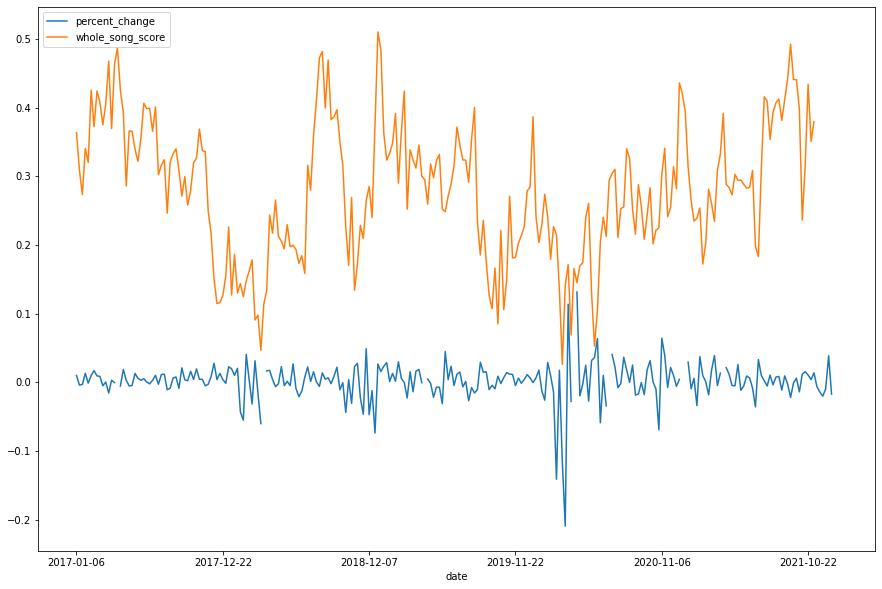

In [39]:
df_all.plot(x='date', y=['percent_change', 'whole_song_score'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

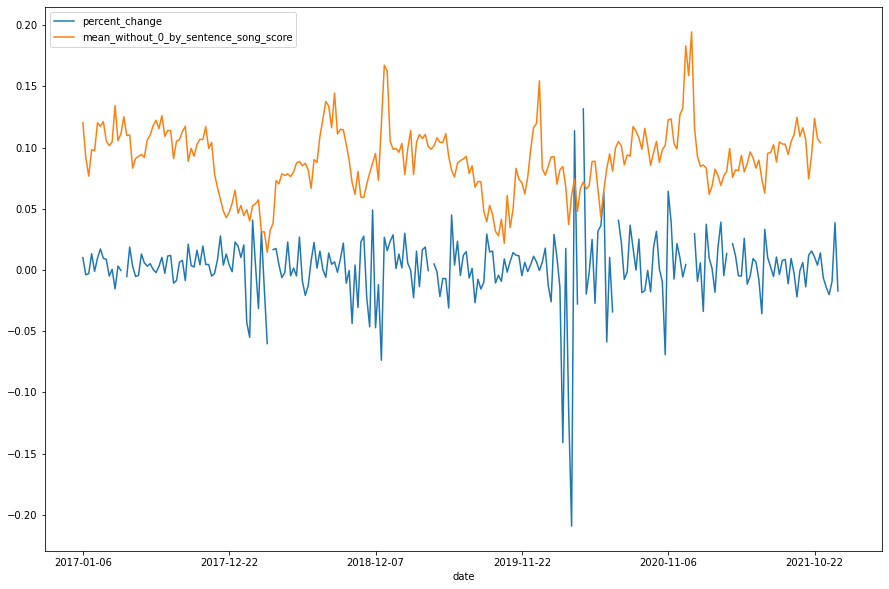

In [40]:
df_all.plot(x='date', y=['percent_change', 'mean_without_0_by_sentence_song_score'], figsize=(15, 10))

<AxesSubplot:xlabel='date'>

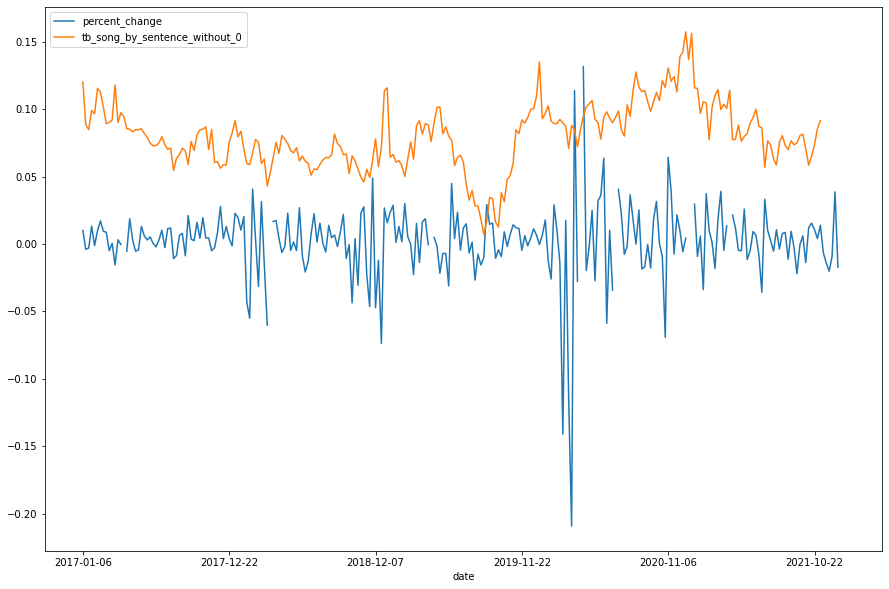

In [41]:
df_all.plot(x='date', y=['percent_change', 'tb_song_by_sentence_without_0'], figsize=(15, 10))

In [42]:
print("ALL")

ALL


In [43]:
df_all['date'] = pd.to_datetime(df_all['date'])

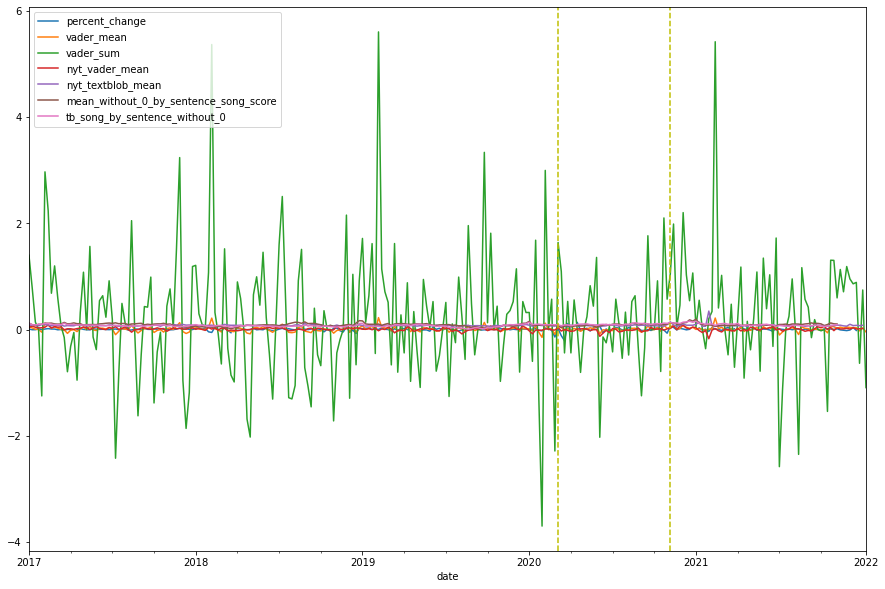

In [44]:
ax = df_all.plot(x='date', y=['percent_change', 'vader_mean', 'vader_sum', 'nyt_vader_mean', 'nyt_textblob_mean', 'mean_without_0_by_sentence_song_score', 'tb_song_by_sentence_without_0'], figsize=(15, 10))
#covidDate = df_all['date']=='2020-03-01'
#ax.vlines(x=['2020-03-01', '2020-11-06'], ymin=-0.25, ymax=0.25, color='r', linestyle='--')
ax.axvline(x='2020-11-01', color='y', linestyle='--')
ax.axvline(x='2020-03-01', color='y', linestyle='--')

#ax.axvline(x=covidDate, ymin=-1, ymax=1, color='r', linestyle='--', lw=2)








In [45]:
df_all.corr(method='pearson')

vader_mean  vader_sum  \
vader_mean                               1.000000   0.997509   
vader_sum                                0.997509   1.000000   
vader_weighted_mean                      0.772386   0.773877   
vader_weighted_sum                       0.767767   0.772407   
textblob_mean                            0.492506   0.489761   
textblob_sum                             0.492974   0.492324   
textblob_weighted_mean                   0.430398   0.430627   
textblob_weighted_sum                    0.432182   0.433209   
trends_bert_mean                         0.223112   0.214080   
trends_bert_sum                          0.202747   0.202978   
 value                                   0.034454   0.027175   
change                                   0.126134   0.120249   
percent_change                           0.124793   0.118747   
Open                                     0.039301   0.032937   
High                                     0.040346   0.034090   
Low                                      0.039849   0.033442   
Close                                    0.042993   0.036596   
Adj Close                                0.043224   0.036739   
Volume                                  -0.011643  -0.005186   
change_VTI                               0.120314   0.115759   
percent_change_VTI                       0.117717   0.112643   
change_adj                               0.117688   0.113100   
percent_change_adj                       0.115113   0.109904   
nyt_vader_mean                           0.122393   0.125034   
nyt_vader_sum                            0.090900   0.093123   
nyt_textblob_mean                        0.025466   0.025086   
nyt_textblob_sum                        -0.005679  -0.006004   
whole_song_score                        -0.037704  -0.032779   
mean_by_sentence_song_score             -0.062813  -0.058517   
mean_without_0_by_sentence_song_score   -0.042603  -0.039008   
tb_whole_song                            0.007117   0.008630   
tb_song_by_sentence                      0.009799   0.009879   
tb_song_by_sentence_without_0            0.011864   0.012341   

                                       vader_weighted_mean  \
vader_mean                                        0.772386   
vader_sum                                         0.773877   
vader_weighted_mean                               1.000000   
vader_weighted_sum                                0.998687   
textblob_mean                                     0.310269   
textblob_sum                                      0.311634   
textblob_weighted_mean                            0.396521   
textblob_weighted_sum                             0.398688   
trends_bert_mean                                  0.146371   
trends_bert_sum                                   0.137178   
 value                                            0.033589   
change                                            0.089551   
percent_change                                    0.085599   
Open                                              0.041565   
High                                              0.043477   
Low                                               0.043311   
Close                                             0.046155   
Adj Close                                         0.047957   
Volume                                            0.006117   
change_VTI                                        0.076161   
percent_change_VTI                                0.074466   
change_adj                                        0.074576   
percent_change_adj                                0.072533   
nyt_vader_mean                                    0.179503   
nyt_vader_sum                                     0.137665   
nyt_textblob_mean                                 0.029994   
nyt_textblob_sum                                 -0.000392   
whole_song_score                                  0.036776   
mean_by_sentence_song_score                      -0.012160   
me

In [46]:
from scipy.stats import pearsonr

df_all2 = df_all.interpolate(method ='pad', limit_direction ='forward', inplace=False)





pearsonr(df_all2['vader_mean'], df_all2['percent_change'])

(0.1308949336194755, 0.034199759716325814)

In [47]:
print("VTI")

VTI


<AxesSubplot:xlabel='date'>

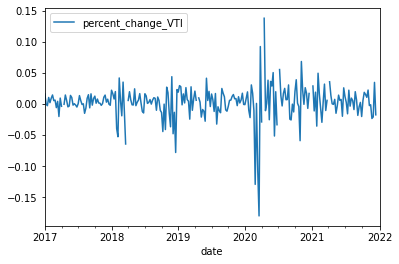

In [48]:
df_all.plot(x='date', y=['percent_change_VTI'])

<AxesSubplot:xlabel='date'>

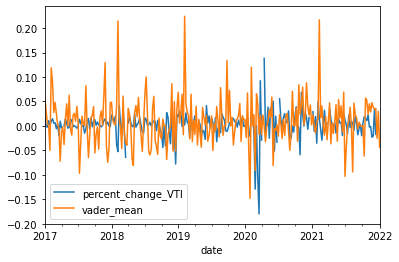

In [49]:
df_all.plot(x='date', y=['percent_change_VTI', 'vader_mean'])

<AxesSubplot:xlabel='date'>

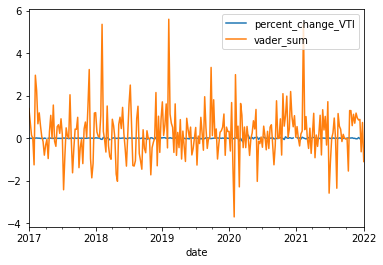

In [50]:
df_all.plot(x='date', y=['percent_change_VTI', 'vader_sum'])

<AxesSubplot:xlabel='date'>

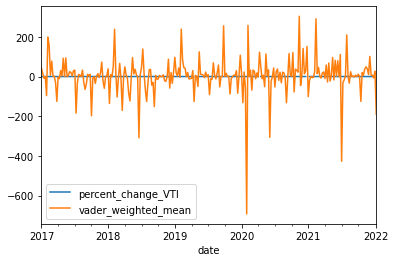

In [51]:
df_all.plot(x='date', y=['percent_change_VTI', 'vader_weighted_mean'])

<AxesSubplot:xlabel='date'>

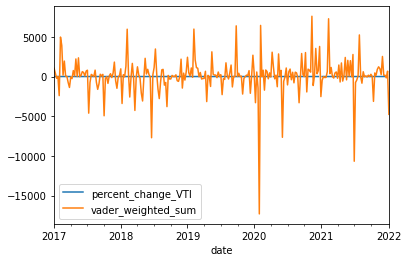

In [52]:
df_all.plot(x='date', y=['percent_change_VTI', 'vader_weighted_sum'])

In [53]:
print("VTI ADJ")

VTI ADJ


<AxesSubplot:xlabel='date'>

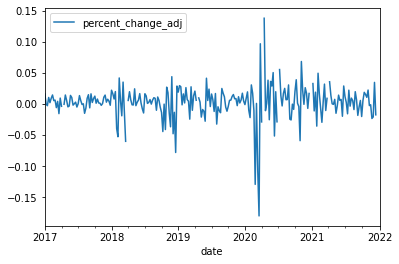

In [54]:
df_all.plot(x='date', y=['percent_change_adj'])

<AxesSubplot:xlabel='date'>

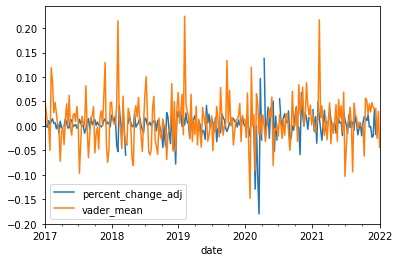

In [55]:
df_all.plot(x='date', y=['percent_change_adj', 'vader_mean'])

<AxesSubplot:xlabel='date'>

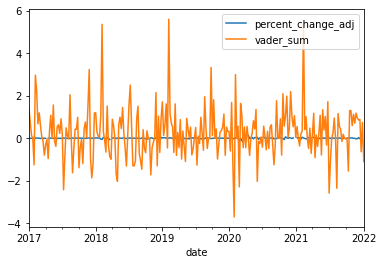

In [56]:
df_all.plot(x='date', y=['percent_change_adj', 'vader_sum'])

<AxesSubplot:xlabel='date'>

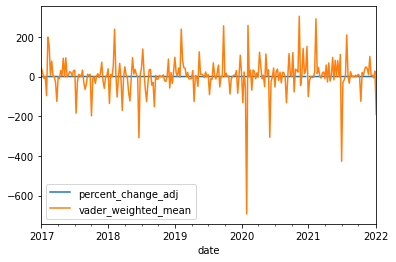

In [57]:
df_all.plot(x='date', y=['percent_change_adj', 'vader_weighted_mean'])

<AxesSubplot:xlabel='date'>

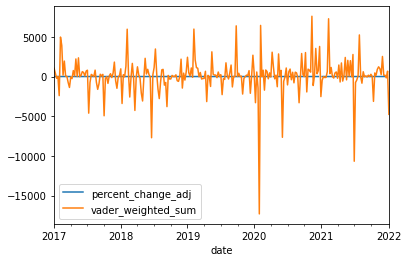

In [58]:
df_all.plot(x='date', y=['percent_change_adj', 'vader_weighted_sum'])